In [1]:
import xarray as xr

clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_20180102-20180102_sossheig.zarr"

ds = xr.open_dataset(clf,engine='zarr')

In [2]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:               (y: 10842, x: 12960, time_counter: 24, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 562MB ...
    nav_lon               (y, x) float32 562MB ...
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2018-01-02T00:30...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    sossheig              (time_counter, y, x) float32 13GB ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 384B ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 384B ...
Attributes: (12/14)
    Conventions:  CF-1.8
    NCO:          netCDF Operators version 5.1.9 (Homepage = http://nco.sf.ne...
    area:         Global
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    description:  ocean T grid variables
    ...           ...
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    references:   http://marine.copernicus.eu
    source:       MOI ORCA36
    title:        daily mean fields from Ensemble Global Ocean Physics Foreca...
    uuid:         7258888c-971e-4442-9df6-b0d8febd6515

In [3]:
ds.nav_lon.max()

<xarray.DataArray 'nav_lon' ()> Size: 4B
array(180., dtype=float32)

In [5]:
min_lonGS = -82
min_latGS = 25
max_lonGS = -50
max_latGS = 43

In [6]:
mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)

dsGS = ds.where(mask_lon & mask_lat, drop=True)

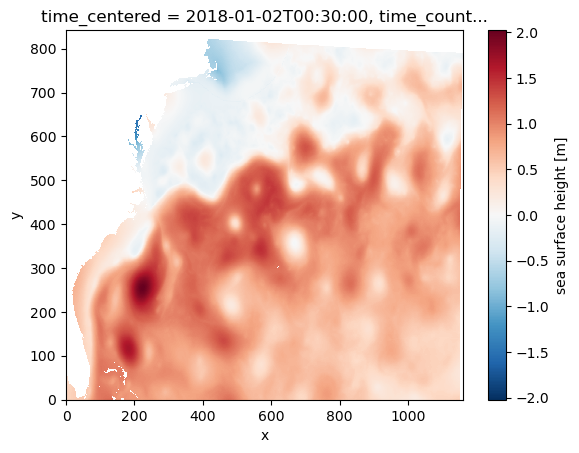

In [7]:
dsGS.sossheig[0].plot()

In [8]:
dsGS

<xarray.Dataset> Size: 853MB
Dimensions:               (time_counter: 24, y: 843, x: 1160, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 4MB 25.01 25.01 25.01 ... 44.04 44.04
    nav_lon               (y, x) float32 4MB -81.97 -81.94 ... -50.09 -50.06
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2018-01-02T00:30...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    sossheig              (time_counter, y, x) float32 94MB 0.4386 ... nan
    time_centered_bounds  (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
    time_counter_bounds   (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
Attributes: (12/14)
    Conventions:  CF-1.8
    NCO:          netCDF Operators version 5.1.9 (Homepage = http://nco.sf.ne...
    area:         Global
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    description:  ocean T grid variables
    ...           ...
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    references:   http://marine.copernicus.eu
    source:       MOI ORCA36
    title:        daily mean fields from Ensemble Global Ocean Physics Foreca...
    uuid:         7258888c-971e-4442-9df6-b0d8febd6515

In [10]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 68.3 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


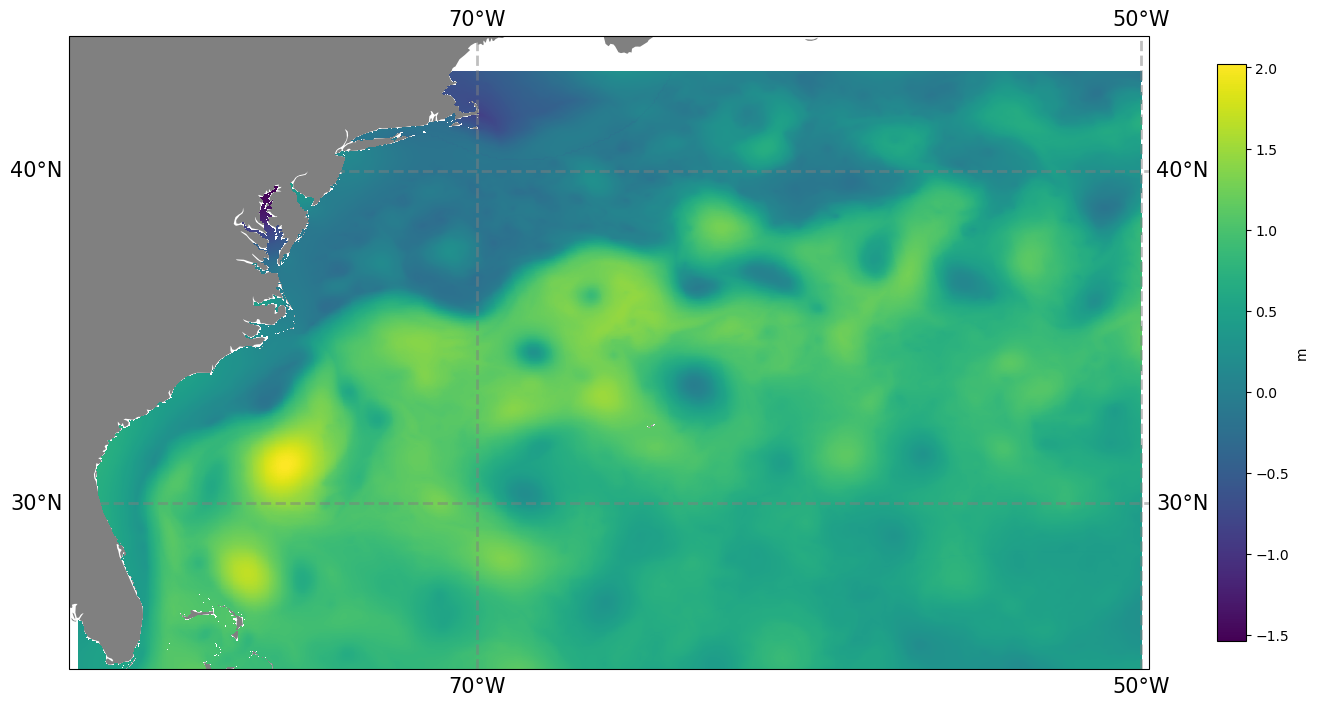

In [19]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

pcolor=ax.pcolormesh(dsGS.nav_lon,dsGS.nav_lat,dsGS.sossheig[0],transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND,facecolor='grey')
#ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
gl.xlocator = mticker.FixedLocator([-90,-70,-50,-30])
gl.ylocator = mticker.FixedLocator([20,30,40,50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.xlabels_top = False
#gl.ylabels_left = False

cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='m')
#ax.text(0.75, 0.25, 'AVISO',fontsize=15, color='white', transform=ax.transAxes)
#ax.set_title('AVISO',size=15,y=1.05)

